# Método de Van Der Veen Original (1953)

### $$P=R\left(1-e^{-(a\rho)}\right)$$

### $$a\rho=-ln\left(1-\frac{P}{R}\right)$$

### $$\rho=-\frac{1}{a}ln\left(1-\frac{P}{R}\right)$$

### $$\rho=-\frac{1}{a}ln\left(1-\frac{P}{R}\right)=\alpha X$$

### $$P=R\left(1-e^{-(\alpha^{-1}\rho)}\right)$$

# Método de Van Der Veen com contribuição de Aoki (1993)

### $$P=R\left(1-e^{-(a\rho+b)}\right)$$

### $$a\rho+b=-ln\left(1-\frac{P}{R}\right)$$

### $$\rho=-\frac{1}{a}ln\left(1-\frac{P}{R}\right)+b$$

### $$\rho=-\frac{1}{a}ln\left(1-\frac{P}{R}\right)+b=\alpha X +\beta$$

## $$P=R\left(1-e^{-(\frac{\rho-\beta}{\alpha})}\right)$$

## Exercício
Estaca pré-moldada de concreto com carga de catálogo de $400 kN$, diâmtero $D=0,22 m$, comprimento cravado de $L=12 m$ e módulo de eleasticidade $E= 28 GPa$.
#### Exercício do Livro *Fundações: ensaios estáticos e dinâmicos* de José Carlos A. Cintra, Nelson Aoki, Cristina H. C. Tsuha e Heraldo L. Giacheti


In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#Dados da prova de carga estática
P=np.array([80,160,240,320,400,480,560,640,720,800])
rho=np.array([0.2,0.6,1.2,1.9,2.7,3.8,5.2,7.0,9.2,12.4])

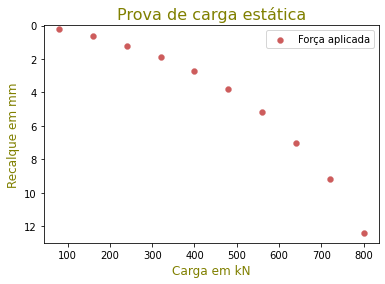

In [87]:
plt.scatter(P,rho, color='indianred',lw=0.3, label='Força aplicada')
plt.ylim(13,-0.01)
plt.title("Prova de carga estática", color="olive",fontsize=16)
plt.xlabel("Carga em kN", color="olive", fontsize=12)
plt.ylabel("Recalque em mm", color="olive", fontsize=12)


plt.legend()

### Construindo $-ln(1-\frac{P}{R})$

A construção do par $\rho$ *versus* $-ln\left(1-\frac{P}{R}\right)$ é por tentativas, portanto, depende do *feeling* do analista, embora exista a validação pela escolha do melhor $R^2$. Optamos por R{820,840,860,880,900, 920 e 940}.


In [88]:
R820=-(np.log(1-P/820))
R840=-(np.log(1-P/840))
R860=-(np.log(1-P/860))
R880=-(np.log(1-P/880))
R900=-(np.log(1-P/900))
R920=-(np.log(1-P/920))
R940=-(np.log(1-P/940))

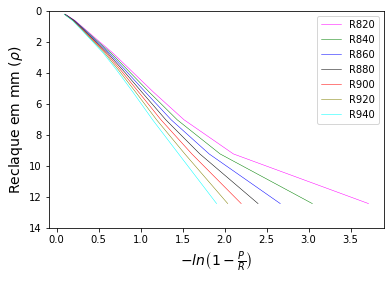

In [89]:
plt.plot(R820,rho, color='fuchsia',lw=0.5, label='R820')
plt.plot(R840,rho, color='green',lw=0.5, label='R840')
plt.plot(R860,rho, color='blue',lw=0.5, label='R860')
plt.plot(R880,rho, color='black',lw=0.5, label='R880')
plt.plot(R900,rho, color='red',lw=0.5, label='R900')
plt.plot(R920,rho, color='olive',lw=0.5, label='R920')
plt.plot(R940,rho, color='cyan',lw=0.5, label='R940')
plt.xlabel(r"$-ln\left(1-\frac{P}{R}\right)$",fontsize=14)
plt.ylabel(r"Reclaque em mm $(\rho)$", fontsize=14)

plt.ylim(14,-0.01)
plt.savefig('lnPR.pdf')
plt.legend()

### Vamos construir um modelo linear para cada reta do par $-ln\left(1-\frac{P}{R}\right)$ *versus* $\rho$.

In [90]:
ml820=np.polyfit(R820,rho,1)
ml840=np.polyfit(R840,rho,1)
ml860=np.polyfit(R860,rho,1)
ml880=np.polyfit(R880,rho,1)
ml900=np.polyfit(R900,rho,1)
ml920=np.polyfit(R920,rho,1)
ml940=np.polyfit(R940,rho,1)


### Para cada função estimada vamos calcular o coefieciente de  determinação $R^2$

In [91]:
#Determinação do coeficiente angular e intercepto para cada reta -ln(1-P/R)
y820=ml820[0]*R820+ml820[1]
y840=ml840[0]*R840+ml840[1]
y860=ml860[0]*R860+ml860[1]
y880=ml880[0]*R880+ml880[1]
y900=ml900[0]*R900+ml900[1]
y920=ml920[0]*R920+ml920[1]
y940=ml940[0]*R940+ml940[1]

#cálculo dos resíduos para cada reta -ln(1-P/R)
yr820=rho-y820
yr840=rho-y840
yr860=rho-y860
yr880=rho-y880
yr900=rho-y900
yr920=rho-y920
yr940=rho-y940

#Cálculo da soma dos quadrados dos resíduos para cada reta -ln(1-P/R)
SQyr820=np.sum(yr820**2)
SQyr840=np.sum(yr840**2)
SQyr860=np.sum(yr860**2)
SQyr880=np.sum(yr880**2)
SQyr900=np.sum(yr900**2)
SQyr920=np.sum(yr920**2)
SQyr940=np.sum(yr940**2)

#Cálculo das ordenadas subtraída a média das mesmas ordenadas para cada reta -ln(1-P/R)
rho_T=rho-np.mean(rho)

#Cálculo da soma das ordenadas subtraída a média das mesmas ordenadas para cada reta -ln(1-P/R)

SQ_T=np.sum(rho_T**2)

#Cálculo de cada coeficiente de determinação ou ajuste para cada reta -ln(1-P/R)


R2_820=1-SQyr820/SQ_T
R2_840=1-SQyr840/SQ_T
R2_860=1-SQyr860/SQ_T
R2_880=1-SQyr880/SQ_T
R2_900=1-SQyr900/SQ_T
R2_920=1-SQyr920/SQ_T
R2_940=1-SQyr940/SQ_T

R2=[R2_820,R2_840,R2_860,R2_880,R2_900,R2_920,R2_940]

In [92]:
print(f'A lista dos coeficientes de determinação é R2_820:{R2_820:0.4f}')
print(f'A lista dos coeficientes de determinação é R2_840:{R2_840:0.4f}')
print(f'A lista dos coeficientes de determinação é R2_860:{R2_860:0.4f}')
print(f'A lista dos coeficientes de determinação é R2_880:{R2_880:0.4f}')
print(f'A lista dos coeficientes de determinação é R2_900:{R2_900:0.4f}')
print(f'A lista dos coeficientes de determinação é R2_920:{R2_920:0.4f}') 
print(f'A lista dos coeficientes de determinação é R2_940:{R2_940:0.4f}')

A lista dos coeficientes de determinação é R2_820:0.9582
A lista dos coeficientes de determinação é R2_840:0.9844
A lista dos coeficientes de determinação é R2_860:0.9938
A lista dos coeficientes de determinação é R2_880:0.9974
A lista dos coeficientes de determinação é R2_900:0.9984
A lista dos coeficientes de determinação é R2_920:0.9981
A lista dos coeficientes de determinação é R2_940:0.9971


### Como se observa o coeficiente de determinação a ser adotado é o R2_900, desse modo a carga de ruptura é 900 kN e  é necessário construir a função: $$P=R\left(1-e^{-(\frac{\rho-\beta}{\alpha})}\right)$$ com os valores do ajuste para $y 900$.

In [93]:
print(f'O valor de alfa ou coeficiente angular é {ml900[0]:0.4f}')
print(f'O valor de beta ou coeficiente linear é {ml900[1]:0.4f}')
print(f'O valor do inverso de alfa ou do coeficiente angular é {1/ml900[0]:0.4f}')
print(f'A reta que descreve o ajuste para -ln(1-P/R) é y={1/ml900[0]:0.4f}x+({1/ml900[1]:0.4f})')


O valor de alfa ou coeficiente angular é 5.9700
O valor de beta ou coeficiente linear é -0.6008
O valor do inverso de alfa ou do coeficiente angular é 0.1675
A reta que descreve o ajuste para -ln(1-P/R) é y=0.1675x+(-1.6643)


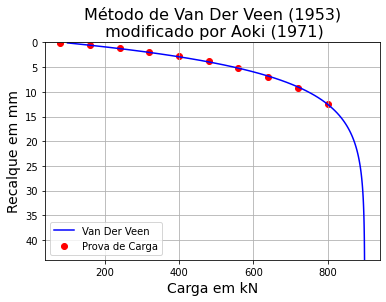

In [142]:
plt.scatter(P,rho,color='red', label='Prova de Carga')
y=np.linspace(0.1,44,100)
R=900
alfa=ml900[0]
beta=ml900[1]
A=-(y-beta)/alfa
Pr=R*(1-np.exp(A))
plt.plot(Pr,y,color='blue', label='Van Der Veen')
plt.xlabel("Carga em kN", fontsize=14)
plt.ylabel("Recalque em mm", fontsize=14)
plt.title("Método de Van Der Veen (1953)\n modificado por Aoki (1971)", fontsize=16)
plt.ylim(44,-0.01)
plt.grid()


plt.legend()

In [95]:
print(f'Valor de alfa: {alfa:0.5f}')
print(f'Valor do inverso de alfa: {1/alfa:0.5f}')
print(f'Valor de beta: {beta:0.5f}')
print(f'O valor de R2 para o ajuste de Van Der Veen: {R2_900:0.5f}')

Valor de alfa: 5.97001
Valor do inverso de alfa: 0.16750
Valor de beta: -0.60085
O valor de R2 para o ajuste de Van Der Veen: 0.99843


# Método de Chin-Kondner (1963,1970, 1971)
### Este método considera que, nas proximidades da ruptura, a curva carga *versus* recalque seja hiperbólica. O recalque dividido pela carga correspondente $\left(\frac{\rho}{P}\right)$, é plotado em gráfico em função do recalque $(\rho)$. Determina-se o coeficiente angular do trecho reto, sendo o inverso deste valor à carga de ruptura $(R)$.

In [96]:
rho_P=rho/P

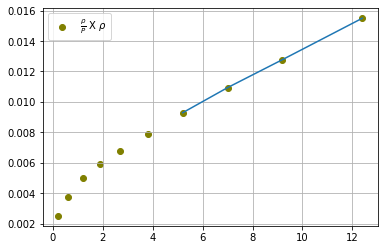

In [97]:
plt.scatter(rho,rho_P, color="olive", label=r"$\frac{\rho}{P}$ X $\rho$")
plt.plot(rho[6:10],rho_P[6:10])
plt.grid()
plt.legend()

In [98]:
rho[6]

5.2

In [99]:
Z=np.array([1,2,3,4,5])
n=len(Z)
ZR=Z[1:n]
ZR

array([2, 3, 4, 5])

In [100]:
# Construindo um modelo linear
n=len(rho)
rho_PC=rho_P[6:n]
rho_C=rho[6:n]
mlc=np.polyfit(rho_C,rho_PC,1)
yC=mlc[0]*rho_C+mlc[1]

yrC=rho_PC-yC
SQyrC=np.sum(yrC**2)
rhoC_T=rho_C-np.mean(rho_C)
SQ_T=np.sum(rhoC_T**2)

R2C=1-(SQyrC/SQ_T)

R2C


0.999999999790957

In [101]:
alfa_C=mlc[0]
beta_C=mlc[1]

In [102]:
print(f'O valor de alfa é {alfa_C:0.5f}')
print(f'O valor de beta é {beta_C:0.5f}')
print(f'A carga de ruptura é {1/alfa_C:0.2f} kN')
print(f'O valor de R2 para o ajuste Chin-Kondener é {R2C:0.5f}')
print(f'A reta de ajuste é y={mlc[0]}x + {mlc[0]}')

O valor de alfa é 0.00086
O valor de beta é 0.00487
A carga de ruptura é 1163.89 kN
O valor de R2 para o ajuste Chin-Kondener é 1.00000
A reta de ajuste é y=0.0008591878912508472x + 0.0008591878912508472


In [103]:
1/alfa_C

1163.8897733348542

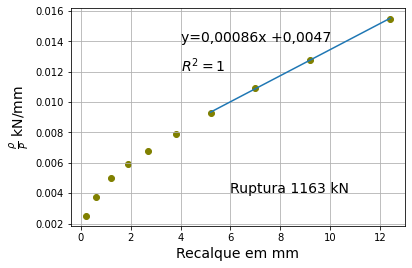

In [104]:
plt.scatter(rho,rho_P, color="olive", label="$\frac{\rho}{P}$ X $\rho$")
plt.plot(rho_C,yC)
plt.xlabel("Recalque em mm", fontsize=14)
plt.ylabel(r"$\frac{\rho}{P}$ kN/mm", fontsize=14)
plt.text(4,0.014,r'y=0,00086x +0,0047', fontsize=14)
plt.text(4,0.012,r'$R^2=1$', fontsize=14)
plt.text(6,0.004,r'Ruptura 1163 kN', fontsize=14)



plt.grid()

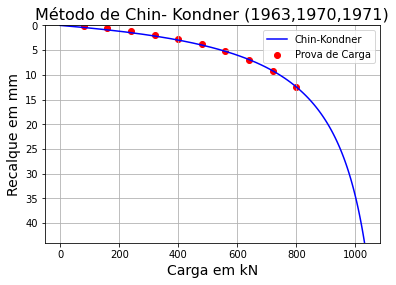

In [143]:
plt.scatter(P,rho,color='red', label='Prova de Carga')
y=np.linspace(0,44,100)
x=y/(mlc[0]*y+mlc[1])

plt.plot(x,y,color='blue', label='Chin-Kondner')
plt.xlabel("Carga em kN", fontsize=14)
plt.ylabel("Recalque em mm", fontsize=14)
plt.title("Método de Chin- Kondner (1963,1970,1971)", fontsize=16)
plt.legend()
plt.ylim(44,-0.01)
plt.grid()



# Método Décourt (1999)

### Para aplicar o método de Décourt (1999), divide-se a carga pelo recalque correspondente $\left(\frac{P}{\rho}\right)$ e plota-se num gráfico em função da carga (P). A carga de ruptura (R) é determinada pela Equação 5. A Equação 6 define a curva carga x recalque ideal extrapolada pelo método.

In [111]:
P_rho=P/rho

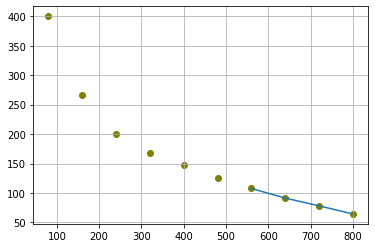

In [131]:
plt.scatter(P,P_rho, color="olive", label="$\frac{\rho}{P}$ X $\rho$")
plt.plot(P_D,rho_D)
plt.grid()

In [132]:
# Construindo um modelo linear
P_D=P[6:n]
rho_D=P_rho[6:n]
mld=np.polyfit(P_D,rho_D,1)
yD=mld[0]*P_D+mld[1]

yrD=rho_D-yD
SQyrD=np.sum(yrD**2)
rhoD_T=rho_D-np.mean(rho_D)
SQ_T=np.sum(rhoD_T**2)

R2D=1-(SQyrD/SQ_T)
alfaD=mld[0]
betaD=mld[1]

In [135]:
print(f'O valor de alfa é {alfaD:0.5f}')
print(f'O valor de beta é {betaD:0.5f}')
print(f'A carga de ruptura é {np.abs(betaD/alfaD):0.2f} kN')
print(f'O valor de R2 para o ajuste Décourt é {R2D:0.5f}')

O valor de alfa é -0.17837
O valor de beta é 206.76627
A carga de ruptura é 1159.20 kN
O valor de R2 para o ajuste Décourt é 0.99778


In [139]:
RD=np.abs(mld[1]/mld[0])
RD

1159.1967649396886

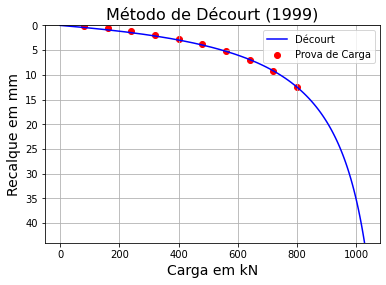

In [140]:
plt.scatter(P,rho,color='red', label='Prova de Carga')
y=np.linspace(0,44,100)
x=mld[1]*y/(1-y*mld[0])

plt.plot(x,y,color='blue', label='Décourt')
plt.xlabel("Carga em kN", fontsize=14)
plt.ylabel("Recalque em mm", fontsize=14)
plt.title("Método de Décourt (1999)", fontsize=16)
plt.legend()
plt.ylim(44,-0.01)
plt.grid()